In [21]:
### Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv("housing.csv")  ### Load the Dataset

In [23]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [24]:
df.head()  ### First 5 rows of dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
df.tail()  ### Last 5 rows of dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [26]:
df.shape  ### Shape of the dataframe

(20640, 10)

# Visualization

In [27]:
df.describe() #Describe the statistical parameter of the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [28]:
ocean_proximity = {'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}  ### Encode the value of ocean_proximity column
df['ocean_proximity'] = df['ocean_proximity'].replace(ocean_proximity)

In [29]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [30]:
df.corr() # want to check the correlation between the features of the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.180381
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.067586
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.204882
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.014818
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.004081
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.008511
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.016911
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.129135
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,-0.210600
ocean_proximity,0.180381,-0.067586,-0.204882,0.014818,0.004081,-0.008511,-0.016911,-0.129135,-0.210600,1.000000


In [31]:
df.corr().style.background_gradient(cmap='YlGnBu')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.180381
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.067586
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.204882
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.014818
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.004081
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.008511
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.016911
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.129135
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,-0.210600
ocean_proximity,0.180381,-0.067586,-0.204882,0.014818,0.004081,-0.008511,-0.016911,-0.129135,-0.210600,1.000000


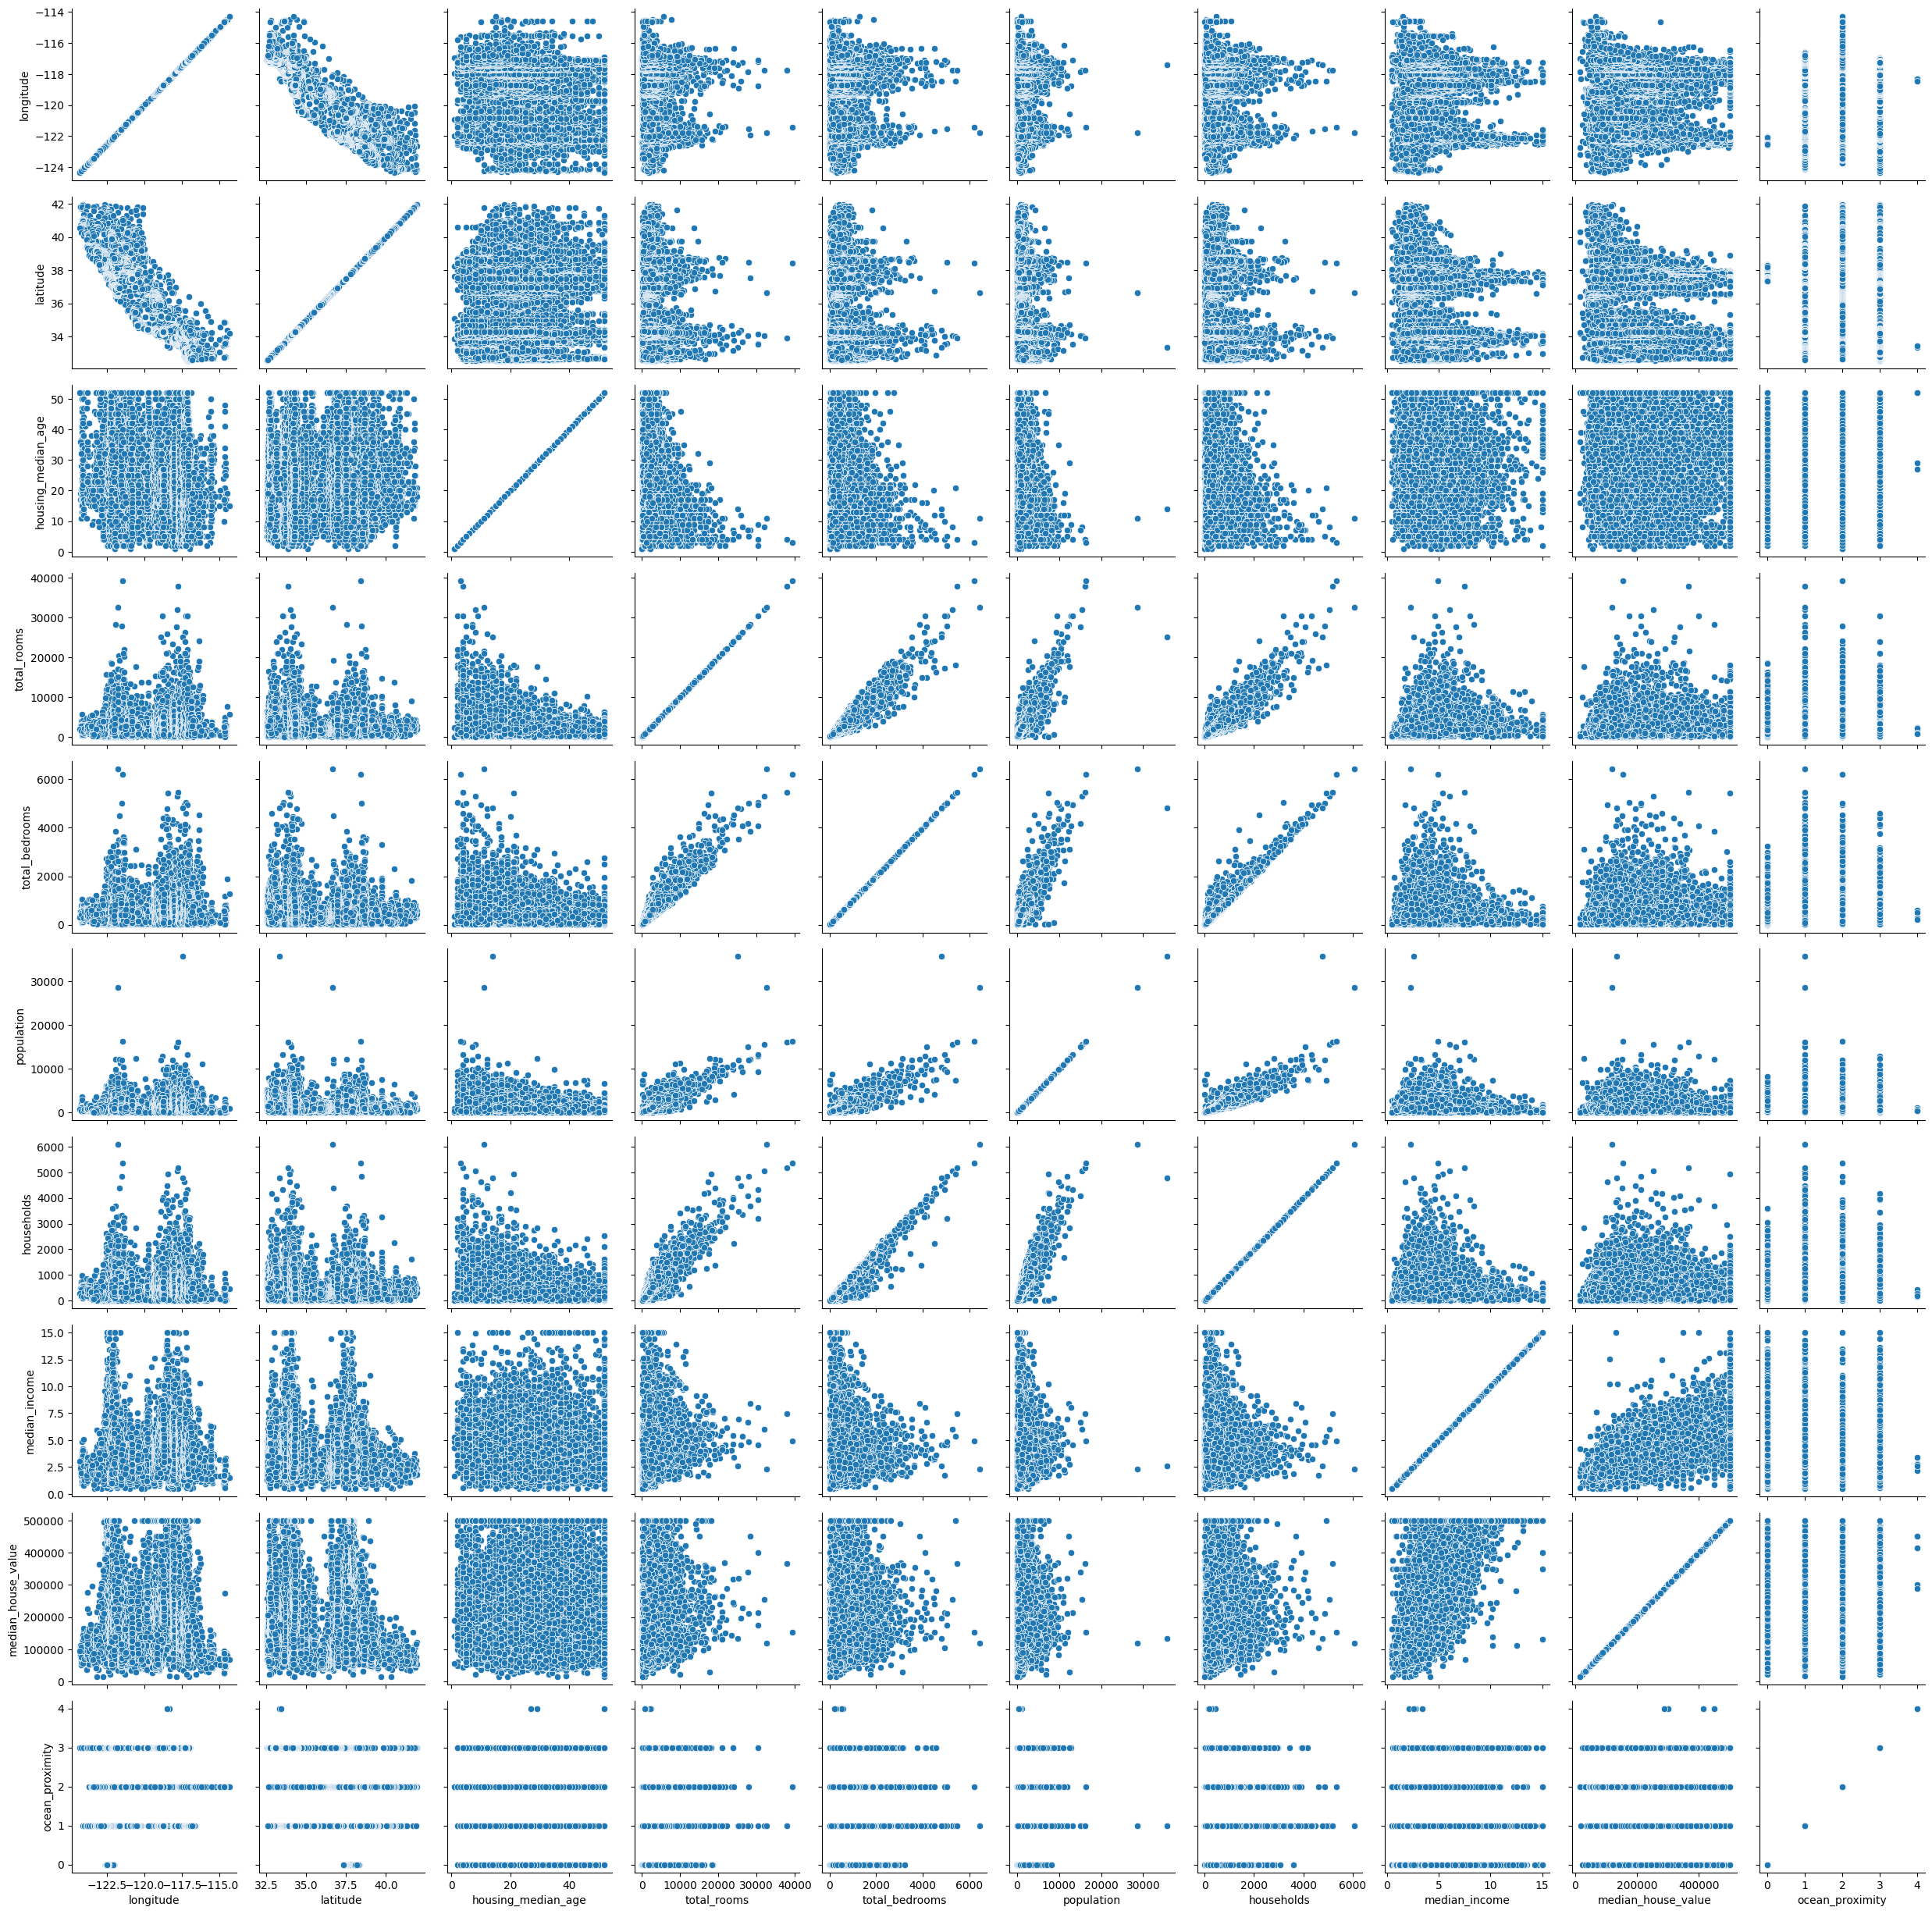

In [32]:
g = sns.PairGrid(df)  # plotting pairwise data relationship how they are related
g.map(sns.scatterplot) 

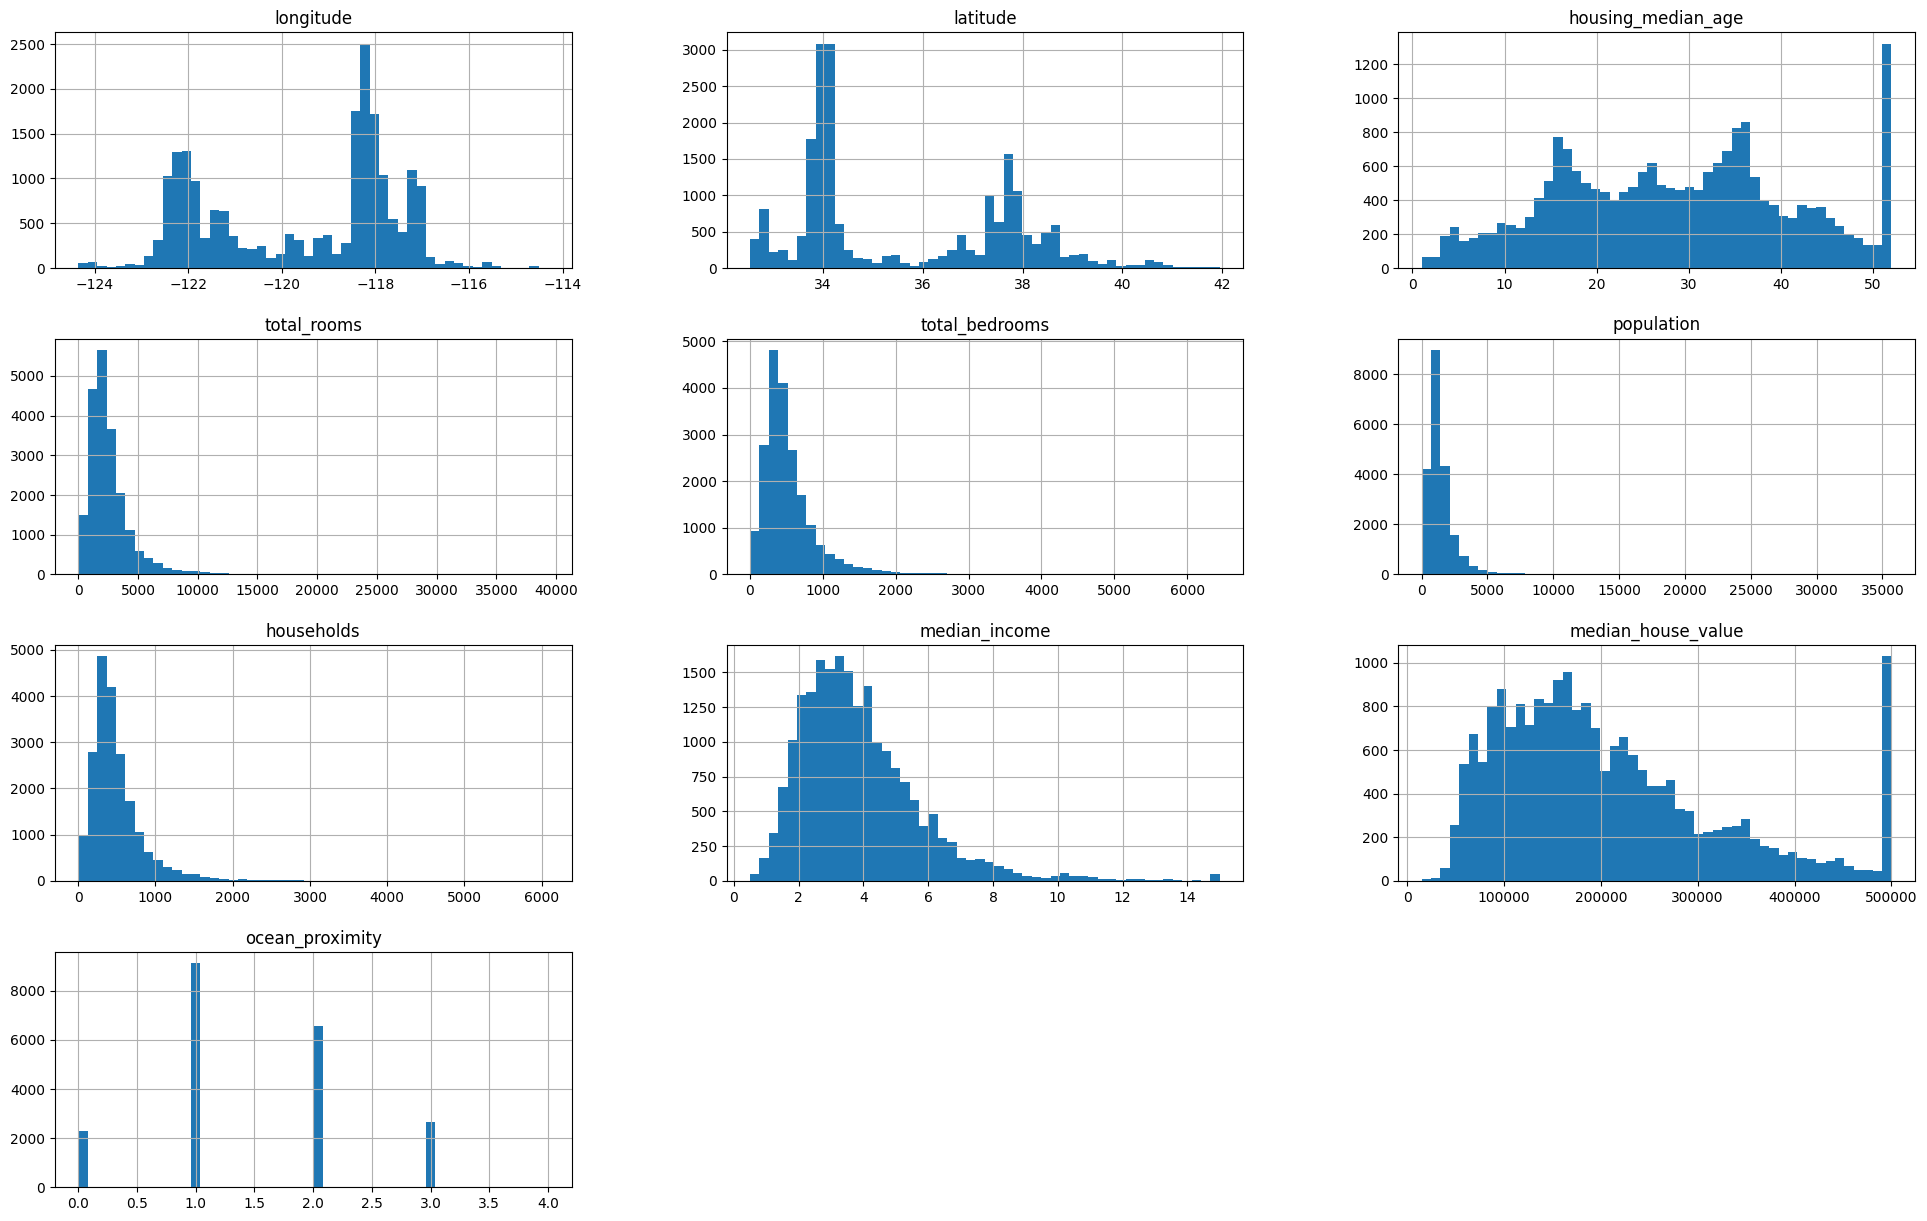

In [33]:
df.hist(bins = 50, figsize = (24, 15)) # histograms for each numerical column in a DataFrame where y axis represent the count of data point and x axis represent the bin (number of intervals)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

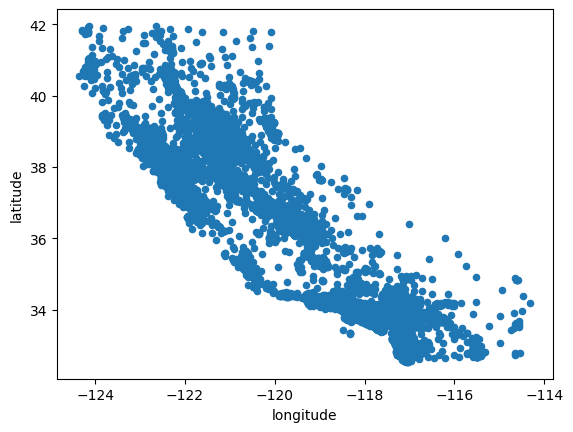

In [34]:
df.plot(kind="scatter",x="longitude",y="latitude") #Plot the geographical data (latitude and longitude) using a scatter plot

<Axes: xlabel='longitude', ylabel='latitude'>

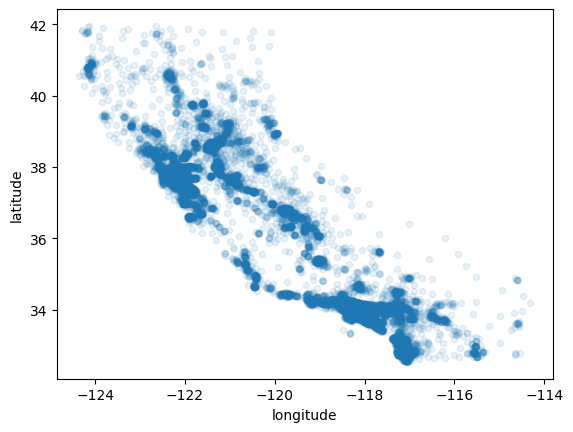

In [35]:
df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1) # high density of points in the plot.

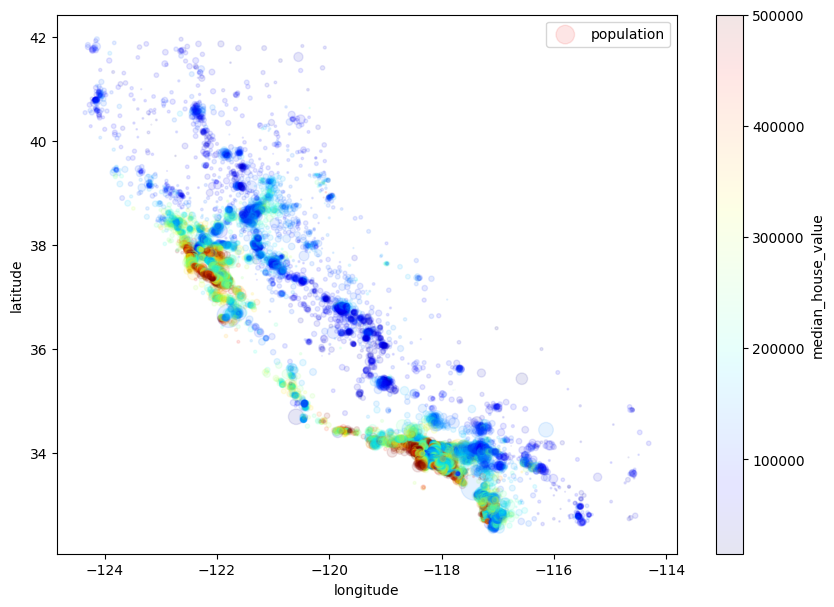

In [36]:
df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,
            s=df["population"]/100, label="population", figsize=(10,7),
         c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True
)
plt.legend() #the point color represents median house value, and the plot includes a color bar to indicate the color scale

<Axes: xlabel='median_income', ylabel='median_house_value'>

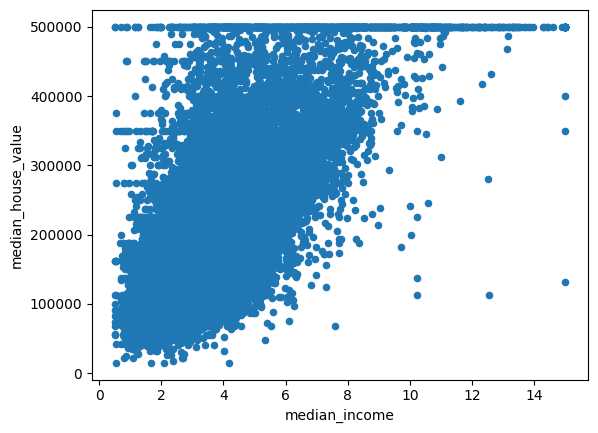

In [37]:
df.plot(kind="scatter",x="median_income",y="median_house_value")

<Axes: xlabel='households', ylabel='total_rooms'>

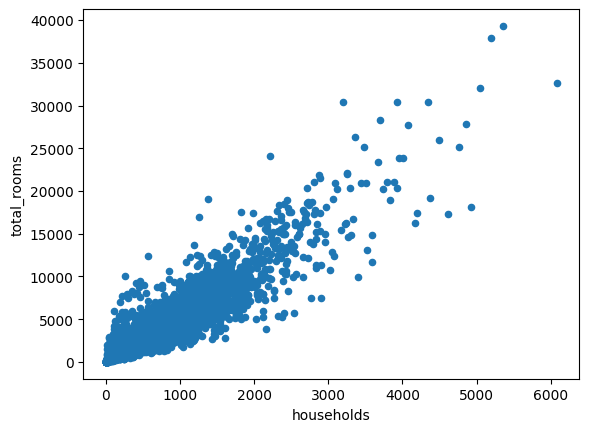

In [38]:

df.plot(kind="scatter",x="households",y="total_rooms")

# Building Model

In [39]:
df.isnull().sum()  ### Print the count of missing values in each column

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [40]:
df.dropna(axis = 0 ,inplace = True) ### Remove rows with null values

In [41]:
df.shape

(20433, 10)

In [42]:
df.columns ## Print the columns name of the dataframe

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [43]:
df['ocean_proximity'].unique()  ### Unique values in ocean_proximity

array([0, 1, 2, 3, 4], dtype=int64)

In [44]:
ocean_proximity = {'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}  ### Encode the value of ocean_proximity column
df['ocean_proximity'] = df['ocean_proximity'].replace(ocean_proximity)

In [45]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [46]:
X = df.drop(columns=['median_house_value'])  ### Features (X)
y = df['median_house_value'] ### Target Variable (Y)

In [47]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,2


In [48]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =0) ### 80-20 Split the data into train, test set

In [50]:
model = LinearRegression()   ### Fit the Linear regression model
model.fit(x_train, y_train)

LinearRegression()

In [51]:
pred = model.predict(x_test)

rmse = mean_squared_error(y_test, pred, squared=False)  ### Calculate RMSE
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, pred)  ### Calculate R2 Score
print("R-squared:", r2)

Root Mean Squared Error: 69274.95173165217
R-squared: 0.6415883892836326


c:\Users\SOUVIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


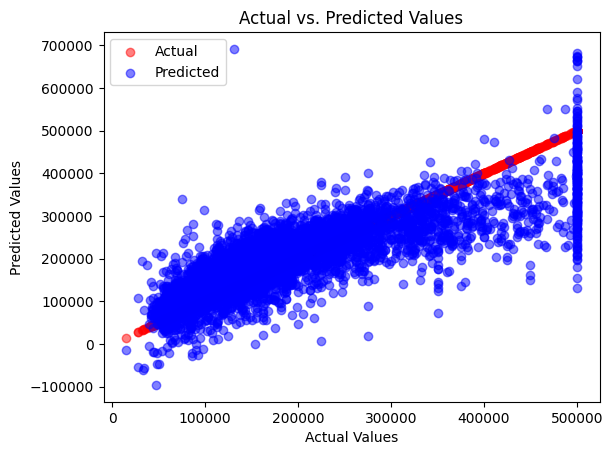

In [52]:
# Create scatter plot for actual values
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5)

# Create scatter plot for predicted values
plt.scatter(y_test, pred, color='blue', label='Predicted', alpha=0.5)

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
# Legend
plt.legend()

# Show plot
plt.show()

# **Hyperparameter Tuning**



*   When fit_intercept=True (default), the linear regression model includes an intercept term, which represents the value of the target variable when all predictors are zero.
*   When fit_intercept=False, the model does not include an intercept term, and the regression line passes through the origin (0,0).



Apply fit_intercept = False

In [53]:
model = LinearRegression(fit_intercept=False)
model.fit(x_train, y_train)
pred = model.predict(x_test)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, pred, squared=False)

# Calculate R-squared
r2 = r2_score(y_test, pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Root Mean Squared Error (RMSE): 73726.89671838332
R-squared (R²): 0.5940416162810562


c:\Users\SOUVIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Apply fit_intercept = True

In [54]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
pred = model.predict(x_test)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, pred, squared=False)

# Calculate R-squared
r2 = r2_score(y_test, pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Root Mean Squared Error (RMSE): 69274.95173165217
R-squared (R²): 0.6415883892836326


c:\Users\SOUVIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Apply Normalization

The function of StandardScaler is to standardize and normalize the input features in a dataset, ensuring they have a mean of 0 and a standard deviation of 1.

In [55]:
# Normalize the features
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

# Fit the model
model = LinearRegression()
model.fit(x_train_normalized, y_train)

# Evaluate the model
pred = model.predict(x_test_normalized)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Root Mean Squared Error (RMSE): 69274.95173165185
R-squared (R²): 0.6415883892836358


c:\Users\SOUVIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Apply  both Normalization and fit_intercept = True

In [56]:
# Normalize the features
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

# Fit the model
model = LinearRegression(fit_intercept=True)
model.fit(x_train_normalized, y_train)

# Evaluate the model
pred = model.predict(x_test_normalized)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Root Mean Squared Error (RMSE): 69274.95173165185
R-squared (R²): 0.6415883892836358


c:\Users\SOUVIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Apply  both Normalization and fit_intercept = False

In [57]:
# Normalize the features
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

# Fit the model
model = LinearRegression(fit_intercept=False)
model.fit(x_train_normalized, y_train)

# Evaluate the model
pred = model.predict(x_test_normalized)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Root Mean Squared Error (RMSE): 218165.72203860802
R-squared (R²): -2.5546974112597645


c:\Users\SOUVIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Interpretation

we get our best fit line of this model and showing in the linear model plot . Here hyperparameter tunning is not more effctive for our model . Because  without this our Rmse value was good.